In [1]:
# Download dataset
import requests
url = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'
filename = 'dataset.csv'
r = requests.get(url, allow_redirects=True)
open(filename, 'wb').write(r.content)

117743

In [2]:
# Read data
import pandas as pd
import numpy as np
data = pd.read_csv(filename)

In [3]:
# Fix unavaliable data (? -> NaN)
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

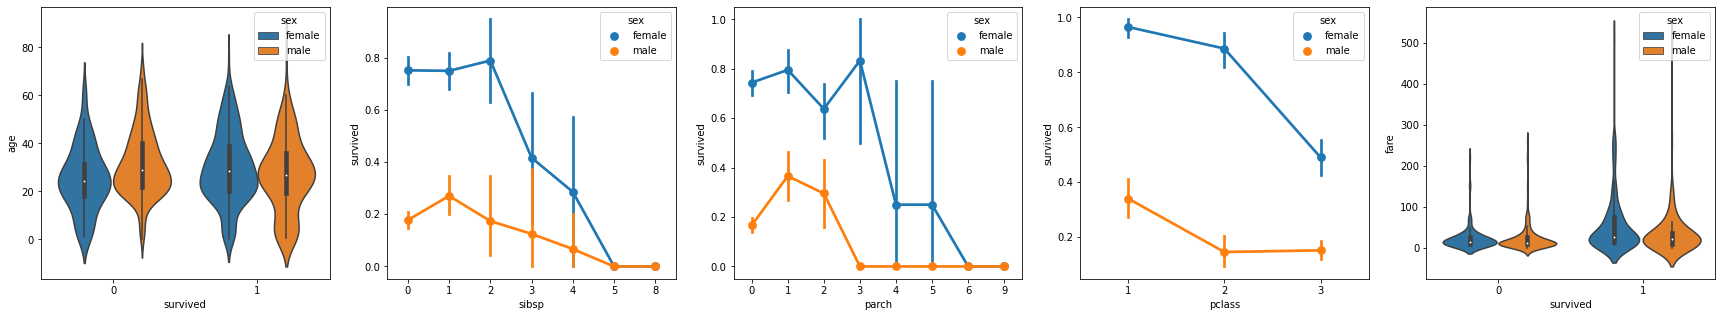

In [4]:
# Plot graphs
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:
# Check correlation for survivability on different fields
data.replace({'male': 1, 'female': 0}, inplace=True)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [6]:
# Add new field and check correlation for survivability again
data['relatives'] = data.apply(lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [7]:
# Clear NaN values
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [8]:
# Split data on train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  data[['sex','pclass','age','relatives','fare']],
  data.survived,
  test_size=0.2,
  random_state=0
)

In [9]:
# Normalize the inputs such that all features are treated equally
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [10]:
# Train the model with Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [11]:
# Check model on the test data
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [12]:
# Create NN model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

Using TensorFlow backend.


In [13]:
# Add layers
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


2021-11-06 21:00:57.003274: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-06 21:00:57.003624: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [14]:
# Train model
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
836/836 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5861
Epoch 2/50
836/836 [==============================] - 0s 102us/step - loss: 0.6899 - accuracy: 0.5861
Epoch 3/50
836/836 [==============================] - 0s 100us/step - loss: 0.6850 - accuracy: 0.5861
Epoch 4/50
836/836 [==============================] - 0s 92us/step - loss: 0.6749 - accuracy: 0.5861
Epoch 5/50
836/836 [==============================] - 0s 104us/step - loss: 0.6591 - accuracy: 0.5861
Epoch 6/50
836/836 [==============================] - 0s 95us/step - loss: 0.6383 - accuracy: 0.5861
Epoch 7/50
836/836 [==============================] - 0s 101us/step - loss: 0.6165 - accuracy: 0.5861
Epoch 8/50
836/836 [==============================] - 0s 98us/step - loss: 0.5974 - accuracy: 0.5861
Epoch 9/50
836/836 [==============================] - 0s 106us/step - loss: 0.5834 - accuracy: 0.5861
Epoch 10/50
836/836 [==============================] - 0s 96us/step - loss: 0.5750 - ac

In [15]:
# Check model on the test data
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8086124401913876
